# Introduction to Python - Analyzing Data

In [60]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-05-26 18:22:32.598949


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import statsmodels.api as sm

Pandas series and dataframes are based on one- and two-dimensional Numpy arrays, respectively. The main difference is that rows and (in the case of multidimensional dataframes) columns have key names that refer to the them, similar to dictionaries. To use an analogy from outside of Python, you can think of series and dataframes as spreadsheets, like used in Excel. 

## Pandas Series

A Pandas series is an one-dimensional array containing data. You can think of it as a dictionary, put in an array, as the following example will show. Start with a dictionary that has integers (here years) as keys and strings (here the name of the Bundesliga champion in that year since 2007) as values.

In [62]:
D = {2007: 'VfB Stuttgart', 2008: 'FC Bayern', 2009: 'VfL Wolfsburg', 2010: 'FC Bayern', \
     2011: 'Borussia Dortmund', 2012: 'Borussia Dortmund', 2013: 'FC Bayern', \
     2014: 'FC Bayern', 2015: 'FC Bayern', 2016: 'FC Bayern', 2017: 'FC Bayern'}

We can use the Pandas **Series** function to convert this dictionary into a Pandas series:

In [63]:
ts = pd.Series(D)
print(type(ts))
print(ts)

<class 'pandas.core.series.Series'>
2007        VfB Stuttgart
2008            FC Bayern
2009        VfL Wolfsburg
2010            FC Bayern
2011    Borussia Dortmund
2012    Borussia Dortmund
2013            FC Bayern
2014            FC Bayern
2015            FC Bayern
2016            FC Bayern
2017            FC Bayern
dtype: object


This *looks* like an array with two columns; however, we can use the **shape** method (that we have seen in the context of Numpy arrays) to verify that this is a one-dimensional array:

In [64]:
print(ts.shape)

(11,)


In fact, only the second column that you see above is treated as data. The first column are the *indices*, i.e. the keys that refer to the rows. We can also see this by applying the **index** method on our **ts** series. This will return the row indices as special type of array:

In [65]:
print(ts.index)

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')


Exactly as with dictionaries, we can use the indices to access an element in the series:

In [66]:
print(ts[2010])
## for comparison, the same notation works for a dictionary
print(D[2010])

FC Bayern
FC Bayern


While this way works, it is recommended to use the **loc** method:

In [67]:
print(ts.loc[2010])

FC Bayern


The important difference between a Pandas series and a dictionary is that the elements in a series are *ordered*, i.e. there is a first element, a second element etc. This is illustrated by the fact that you can also access elements *by its position* rather than by its (row) index. For example, we can check the first element of the series *without using the index of the first row*, using the **iloc** method:

In [68]:
print(ts.iloc[0])
## the following would not work:
# print(ts[0])

VfB Stuttgart


Moreover, the ordering of elements also implies that you can access multiple adjacent elements, using either **loc** or **iloc**: 

In [69]:
print(ts.loc[2010:2012])

2010            FC Bayern
2011    Borussia Dortmund
2012    Borussia Dortmund
dtype: object


In [70]:
print(ts.iloc[:-1:2])

2007        VfB Stuttgart
2009        VfL Wolfsburg
2011    Borussia Dortmund
2013            FC Bayern
2015            FC Bayern
dtype: object


Above, we have used a dictionary to define a Pandas series. We can also use the **Series** function on a list (or tuple). Since in this case, we don't provide any row indices, Pandas automatically uses integers as indices, starting at 0:

In [71]:
lst = [x**2 for x in range(1, 11)]
print(lst)
ts2 = pd.Series(lst)
print(ts2)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
0      1
1      4
2      9
3     16
4     25
5     36
6     49
7     64
8     81
9    100
dtype: int64


In [72]:
print(ts2.index)

RangeIndex(start=0, stop=10, step=1)


Note that in this special case, the indices and the positions of the elements in the series are identical, hence we could use **loc** and **iloc** in the same way.

If we'd like a different numbering, we can also use the **index** argument when defining the series.

In [73]:
ts2 = pd.Series(lst, index = range(1, 11))
print(ts2)

1       1
2       4
3       9
4      16
5      25
6      36
7      49
8      64
9      81
10    100
dtype: int64


#### Useful Methods

In [74]:
ts.describe()

count            11
unique            4
top       FC Bayern
freq              7
dtype: object

For purely numerical arrays (whose **dtype** is **int** or **float**), the **describe** method returns some descriptive statistics:

In [75]:
print(ts2.describe())

count     10.000000
mean      38.500000
std       34.173577
min        1.000000
25%       10.750000
50%       30.500000
75%       60.250000
max      100.000000
dtype: float64


As an aside, note that Pandas arrays, in contrast to Numpy arrays, allows elements of different types, e.g. integers and strings:

In [76]:
ts2[8] = 'FC Bayern'
print(ts2)

1             1
2             4
3             9
4            16
5            25
6            36
7            49
8     FC Bayern
9            81
10          100
dtype: object


Note that this operation changes the **dtype** (data type) of **ts2** from **int** to the more general **object**. As a consequence, calling **describe()** on **ts2** will no longer return any descriptive statistics:

In [77]:
print(ts2.describe())

count     10
unique    10
top       25
freq       1
dtype: int64


In [78]:
ts.head()

2007        VfB Stuttgart
2008            FC Bayern
2009        VfL Wolfsburg
2010            FC Bayern
2011    Borussia Dortmund
dtype: object

In [79]:
ts.tail(3)

2015    FC Bayern
2016    FC Bayern
2017    FC Bayern
dtype: object

In [80]:
ts.count()

11

### Vectorized Operations

In [81]:
first = ts.value_counts()
print(first)

FC Bayern            7
Borussia Dortmund    2
VfL Wolfsburg        1
VfB Stuttgart        1
dtype: int64


In [82]:
print( first > 5 )

FC Bayern             True
Borussia Dortmund    False
VfL Wolfsburg        False
VfB Stuttgart        False
dtype: bool


In [83]:
first[first >= 2]

FC Bayern            7
Borussia Dortmund    2
dtype: int64

#### Addition

In [84]:
L = ['FC Schalke 04', 'Werder Bremen', 'FC Bayern', 'FC Schalke 04', 'Bayer 04 Leverkusen', \
    'FC Bayern', 'Borussia Dortmund', 'Borussia Dortmund', 'VfL Wolfsburg', 'Borussia Dortmund', 'RB Leipzig']
ts3 = pd.Series(L, index = range(2007, 2018))
second = ts3.value_counts()
print(second)

Borussia Dortmund      3
FC Schalke 04          2
FC Bayern              2
Werder Bremen          1
RB Leipzig             1
Bayer 04 Leverkusen    1
VfL Wolfsburg          1
dtype: int64


In [85]:
print(first + second)

Bayer 04 Leverkusen    NaN
Borussia Dortmund      5.0
FC Bayern              9.0
FC Schalke 04          NaN
RB Leipzig             NaN
VfB Stuttgart          NaN
VfL Wolfsburg          2.0
Werder Bremen          NaN
dtype: float64


In [86]:
total = second.add(first, fill_value = 0)
print(total)

Bayer 04 Leverkusen    1.0
Borussia Dortmund      5.0
FC Bayern              9.0
FC Schalke 04          2.0
RB Leipzig             1.0
VfB Stuttgart          1.0
VfL Wolfsburg          2.0
Werder Bremen          1.0
dtype: float64


#### Apply function

In [87]:
total = total.apply(int)
print( total )

Bayer 04 Leverkusen    1
Borussia Dortmund      5
FC Bayern              9
FC Schalke 04          2
RB Leipzig             1
VfB Stuttgart          1
VfL Wolfsburg          2
Werder Bremen          1
dtype: int64


#### Statistics

As with Numpy arrays, we can apply methods for mean, standard deviation, maximum, etc. on Pandas series. A very useful method is **argmax** which returns the index of the row which contains the maximum value. 

In [88]:
total.mean()

2.75

In [89]:
total.std()

2.866057521105554

In [90]:
total.sum()

22

In [91]:
total.max()

9

In [92]:
total.argmax()

'FC Bayern'

### Plotting 

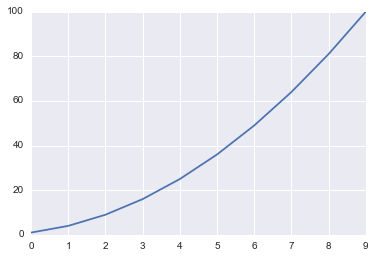

In [93]:
lst = [x**2 for x in range(1, 11)]
ts2 = pd.Series(lst)

fig, ax = plt.subplots()
ax.plot(ts2)

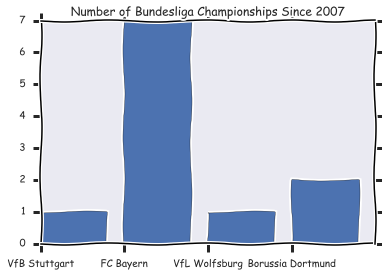

In [94]:
names = ['VfB Stuttgart', 'FC Bayern', 'VfL Wolfsburg', 'Borussia Dortmund']
ts_num = ts.replace(names, range(0,len(names)))
count = ts_num.value_counts()


with plt.xkcd():
    fig, ax = plt.subplots()
    ax.bar(count.index, count)
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names)
    ax.set_title('Number of Bundesliga Championships Since 2007')

### Reading data from a file

So far, we have created Pandas series by first defining a dictionary or list and then using the **Series** function. Typically, in particular with large data sets, you would load your data from a file (e.g. csv, txt, xls) directly into a Pandas series. With a csv file, we can do this with the **read_csv** function. Note that this creates a Pandas *DataFrame* rather than a series - the difference will be clear shortly. For now, just take the code below to define a  series **ts** that containes all the Bundesliga champions from the 1963/64 season onwards. We will use this series for the first question in the problem set. 

In [95]:
Df = pd.read_csv('data/champions.csv')
ts = Df['Club'] ## from DataFrame to Series

In [96]:
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


1964                1. FC Köln
1965             Werder Bremen
1966          TSV 1860 München
1967    Eintracht Braunschweig
1968            1. FC Nürnberg
Name: Club, dtype: object

## Pandas DataFrames

A DataFrame is the two-dimensional version of a Pandas array. All of the methods and functions we have seen for series above work also on DataFrames. Let's start by using **read_csv** to load the data set on Bundesliga players that we have already used in the last lecture.

In [97]:
df = pd.read_csv('data/BundesligaData.csv', sep = ';')

As before, we can use the **head()** method to get a first feel for the data: 

In [98]:
df.head()
# print( df.head() )

,name,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
0,Robert Lewandowski,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3
1,Pierre-Emerick Aubameyang,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3
2,Thomas Mueller,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3
3,Marco Reus,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3
4,Douglas Costa,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3


With DataFrames, there are not only row indices, but also keys for each colum, for example **name**, **position**, **value**, etc. in the Bundesliga data set. The **columns** attribute returns the column names as a list: 

In [99]:
df.columns

Index(['name', 'position', 'value', 'valuemax', 'age', 'goals', 'assists',
       'yellow', 'red', 'shotspergame', 'passsuccess', 'aerialswon', 'rating',
       'positioncode'],
      dtype='object')

For DataFrames, there is an additional very useful method, **info()**, for getting an overview over the data set. It lists all the column names, plus the number of elements in each column, as well as their type: 

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 14 columns):
name            291 non-null object
position        291 non-null object
value           291 non-null float64
valuemax        291 non-null float64
age             291 non-null int64
goals           291 non-null int64
assists         291 non-null int64
yellow          291 non-null int64
red             291 non-null int64
shotspergame    291 non-null float64
passsuccess     291 non-null float64
aerialswon      291 non-null float64
rating          291 non-null float64
positioncode    291 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 31.9+ KB


As with series, the **describe** method gives you some descriptive statistics about the data set, more precisely about each of the columns:

In [101]:
print(df.describe())

            value    valuemax         age       goals     assists      yellow  \
count  291.000000  291.000000  291.000000  291.000000  291.000000  291.000000   
mean     8.122852   10.723196   25.570447    2.625430    1.879725    2.955326   
std      9.775748   11.604983    3.580265    4.019852    2.283970    2.487499   
min      1.000000    1.000000   17.000000    0.000000    0.000000    0.000000   
25%      2.750000    3.500000   23.000000    0.000000    0.000000    1.000000   
50%      4.500000    6.500000   26.000000    1.000000    1.000000    2.000000   
75%     10.000000   12.750000   28.000000    4.000000    3.000000    4.000000   
max     80.000000   80.000000   38.000000   30.000000   18.000000   13.000000   

              red  shotspergame  passsuccess  aerialswon      rating  \
count  291.000000    291.000000   291.000000  291.000000  291.000000   
mean     0.137457      0.985567    75.017526    1.550859    6.814880   
std      0.382828      0.697581     8.857567    1.1202

### Manipulating Columns

Before learning how to access data in a DataFrame, let's first execute some steps that make the data easier to handle. First, note that the player names are given in the form 'firstname lastname', which is somewhat inconvenient if, for example, we'd like to sort the data alphabetically:

In [102]:
df.head()

,name,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
0,Robert Lewandowski,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3
1,Pierre-Emerick Aubameyang,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3
2,Thomas Mueller,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3
3,Marco Reus,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3
4,Douglas Costa,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3


For a given string, say 'Robert Lewandowski', we can write an easy function that returns a string with first and last name reversed, i.e. 'Lewandowski Robert'. With a **try/except** statement, we can take care of cases where no first name is given, e.g. 'Thiago'.

In [103]:
def reverse_name(name):
    L = name.split(" ")
    try:
        S = L[1] + " " + L[0]
    except:
        S = L[0]
    
    return S

print(reverse_name('Robert Lewandowski'))
print(reverse_name('Thiago'))

Lewandowski Robert
Thiago


How to apply this function on each element in the **name** column? In the previous section, we introduced the **apply** method that does precisely this, for both built-in and your own functions. We can use **apply** on a column in a data set, here to *overwrite* the existing **name** column. Note that individual columns in a DataFrame can be accessed using the familiar bracket operator (note the difference to a Pandas series!):

In [104]:
## APPLY
df['name'] = df['name'].apply(reverse_name)
df.head()

,name,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
0,Lewandowski Robert,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3
1,Aubameyang Pierre-Emerick,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3
2,Mueller Thomas,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3
3,Reus Marco,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3
4,Costa Douglas,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3


Note that **apply** by itself does not change the array *in place*, i.e. we need to store the result of the operation as the new **name** column.

Similarly easy as overwriting existing columns is adding new columns. As an example, suppose that instead of having one string with a player's last and first name, we'd like to have two separate columns, **name** (containing only the last name) and **first_name**. Hence, we first need to split the name strings into two strings. We could use **apply** again, in connection with the **split** method for strings. However, for series or DataFrames columns that *contain only strings*, Pandas has a direct way of manipulating strings:

In [105]:
names = df['name'].str.split(expand=True)
names.head()

,0,1
0,Lewandowski,Robert
1,Aubameyang,Pierre-Emerick
2,Mueller,Thomas
3,Reus,Marco
4,Costa,Douglas


As we can see, applying **str.split** creates a new DataFrame. Note that the **expand = True** statement is required for having the first and last names in different columns. We can use the first and second column of the **names** DataFrames to overwrite the **name** column in our Bundesliga DataFrame, and to add a new **first_name** column, respectively. 

In [106]:
## replace column 'name'
df['name'] = names[0]
## add column 'first name'
df['first_name'] = names[1]

df.head()

,name,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
0,Lewandowski,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3,Robert
1,Aubameyang,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3,Pierre-Emerick
2,Mueller,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3,Thomas
3,Reus,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3,Marco
4,Costa,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3,Douglas


As a side note, for players with only one name, this approach would leave the **first_name** field empty, which is indicated by a "None" when printing the data:

In [107]:
df.loc[97]  ## Thiago is at index 97 in the data set

name                Thiago
position        midfielder
value                   40
valuemax                40
age                     26
goals                    6
assists                  5
yellow                   4
red                      0
shotspergame           1.3
passsuccess           90.2
aerialswon             1.7
rating                8.28
positioncode             2
first_name            None
Name: 97, dtype: object

### Setting new indices

Note that the row indices in our Bundesliga dataframe were automatically created from 0 to 290. That can be useful for some applications, but here, assuming we know the player names that we want to get information on, it would be more convenient to have the names as indices. This is easy to do by using the **set_index** method: the first argument refers to the column to be used as the new indices, here **'name'**. By setting the optional argument **drop** to **True**, this column is then dropped from the dataframe (which makes sense). Also, make sure to set the optional argument **inplace** to **True** for the change to become effective (this will be required for many Pandas methods):

In [109]:
# df.index = df['name']
df.set_index('name', drop = True, inplace = True)
## check if change was successful
df.head()

,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
name,,,,,,,,,,,,,,
Lewandowski,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3,Robert
Aubameyang,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3,Pierre-Emerick
Mueller,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3,Thomas
Reus,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3,Marco
Costa,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3,Douglas


### Accessing Elements in DataFrames

In the previous sections, we have already seen that using the bracket operator with a DataFrame accesses a column (rather than a row as with a Pandas series). If you provide an argument that does not refer to a column in the dataframe, you get an error:

In [110]:
## print name column
print( df['value'] )

name
Lewandowski    80.00
Aubameyang     65.00
Mueller        60.00
Reus           40.00
Costa          30.00
Dembele        28.00
Schuerrle      23.00
Chicharito     22.00
Embolo         20.00
Coman          20.00
Modeste        17.00
Volland        17.00
Werner         16.00
Forsberg       15.00
Stindl         13.00
Bailey         12.50
Konoplyanka    12.00
Pulisic        12.00
Robben         10.00
Sabitzer       10.00
Ntep           10.00
Kostic         10.00
Burke          10.00
Kramaric        9.00
Kruse           8.00
Krkic           8.00
Maxim           8.00
Gomez           7.50
Raffael         7.00
Philipp         7.00
               ...  
Schr            3.50
Hector          3.50
Kempf           3.50
Langkamp        3.00
Maroh           3.00
Wollscheid      3.00
Oczipka         3.00
Badstuber       3.00
Caldirola       3.00
Sakai           3.00
Tisserand       3.00
Klostermann     3.00
Passlack        3.00
Gnter           2.75
Russ            2.50
Aogo            2.50
Naldo   

In [112]:
## the following returns an error, since we have dropped the 'name' column above!!!
# print( df['name'] )

#### loc and iloc

The **loc** and **iloc** methods that we have seen for series above also work with dataframes. As with a series, **loc** uses row indices and now also column keys. **iloc** uses the actual position of the row(s) and the column(s) that you'd like to access. 

As an example, suppose we want to print the 'value' (the column key) of the first player in the dataframe, which we know refers to 'Lewandowski' (the row index). The following two statements are then equivalent:

In [114]:
## access an element in the dataframe using loc
print( df.loc['Lewandowski', 'value'] )
## access an element in the dataframe using iloc
print( df.iloc[0, 1] )

80.0
80.0


For **iloc** to work here, of course we need to know the row and column position of the element we're interested in, here **0, 1**. 

While this works fine, note that you can also use the bracket operator together with **loc** or **iloc**. As before the argument given to the bracket operator will refer to the column key; the argument given to **loc** or **iloc** then refers to the row index or row position, respectively. Hence, the example above can also be implemented like this:

In [118]:
## access an element in the dataframe using the bracket operator and loc
print( df['value'].loc['Lewandowski'] )
## access an element in the dataframe using the bracket operator and iloc
print( df['value'].iloc[0] )

80.0
80.0


As an aside, what will not work is giving the column key to both the bracket operator and **loc** or **iloc**:

In [121]:
## the following would have too many indices, and hence return errors
# print( df['value'].loc['Lewandowski', 'value'] )
# print( df['value'].iloc[0, 1] )

When using **loc** or **iloc** with only one argument, it returns the whole row referring to this index or position (assuming that it exists):

In [139]:
print( df.loc['Lewandowski'] )

position        striker
value                80
valuemax             80
age                  28
goals                30
assists               4
yellow                5
red                   0
shotspergame        4.2
passsuccess          75
aerialswon          1.8
rating             7.71
positioncode          3
first_name       Robert
Name: Lewandowski, dtype: object


#### Accessing Multiple Elements

As with Pandas series, the **loc** and **iloc** methods allow you to access multiple elements, with the usual slicing notation: 

In [125]:
## print the values for the first 10 players
print( df['value'].iloc[:10] )

name
Lewandowski    80.0
Aubameyang     65.0
Mueller        60.0
Reus           40.0
Costa          30.0
Dembele        28.0
Schuerrle      23.0
Chicharito     22.0
Embolo         20.0
Coman          20.0
Name: value, dtype: float64

In [128]:
## print the first names for Lewandowski to Costa
print( df['first_name'].loc['Lewandowski' : 'Costa'] )

name
Lewandowski            Robert
Aubameyang     Pierre-Emerick
Mueller                Thomas
Reus                    Marco
Costa                 Douglas
Name: first_name, dtype: object


In [129]:
## print the age, goals and assists for Lewandowski to Costa
print( df.loc['Lewandowski' : 'Costa', 'age' : 'assists'] )

             age  goals  assists
name                            
Lewandowski   28     30        4
Aubameyang    27     29        2
Mueller       27      5       12
Reus          27      5        4
Costa         26      4        3


Note from the last two examples that slicing (that we have seen so far only with integers) works also for row indices and column keys using **loc**. However, what might be a bit confusing: when slicing with **loc**, the last element given in your slice (**Costa** in the example above) is *included* in what is returned. Recall from lists, Numpy arrays etc. that slicing usually returns the elements *excluding the last one given*. In fact this is also true when using **iloc**:

In [131]:
print( df.iloc[0:5, 3:6] )

             age  goals  assists
name                            
Lewandowski   28     30        4
Aubameyang    27     29        2
Mueller       27      5       12
Reus          27      5        4
Costa         26      4        3


As second thing to keep in mind for slicing: when slicing over column keys, you need to give the keys to as an argument to **loc**; the bracket operator will not work:

In [135]:
## the following will throw an error, as slicing in the bracket operator does not work
# print( df['age' : 'assists'].loc['Lewandowski' : 'Costa'] )

When accessing multiple elements, they don't have to be adjacent: you can use arrays containing the indices or keys of the elements:

In [137]:
print( df.loc[('Lewandowski', 'Costa'), ('age','assists')] )

             age  assists
name                     
Lewandowski   28        4
Costa         26        3


In [138]:
players = ['Reus', 'Thiago', 'Forsberg', 'Rudy']
print( df.loc[players, ('age','first_name')] )

          age first_name
name                    
Reus       27      Marco
Thiago     26       None
Forsberg   25       Emil
Rudy       27  Sebastian


#### Logical Arrays

As with Numpy arrays, we can use logical arrays (containing only **True** and **False**) to access elements in a dataframe. For example, suppose we are interested in number of goals scored by defenders only (indicated by a '1' for **'positioncode'** in the data set). The following returns a Pandas series assigning **True** or **False** to each index:

In [149]:
df['positioncode'] == 1

name
Lewandowski    False
Aubameyang     False
Mueller        False
Reus           False
Costa          False
Dembele        False
Schuerrle      False
Chicharito     False
Embolo         False
Coman          False
Modeste        False
Volland        False
Werner         False
Forsberg       False
Stindl         False
Bailey         False
Konoplyanka    False
Pulisic        False
Robben         False
Sabitzer       False
Ntep           False
Kostic         False
Burke          False
Kramaric       False
Kruse          False
Krkic          False
Maxim          False
Gomez          False
Raffael        False
Philipp        False
               ...  
Schr            True
Hector          True
Kempf           True
Langkamp        True
Maroh           True
Wollscheid      True
Oczipka         True
Badstuber       True
Caldirola       True
Sakai           True
Tisserand       True
Klostermann     True
Passlack        True
Gnter           True
Russ            True
Aogo            True
Naldo   

We can use such an array directly as an argument in the **loc** method:

In [152]:
print( df['goals'].loc[ df['positioncode'] == 1 ] )

name
Boateng        0
Alaba          4
Hummels        1
Sokratis       2
Martnez        1
Tah            1
Sle            2
Hwedes         1
Toprak         1
Hector         0
Guerreiro      6
Rodrguez       2
Bernat         2
Christensen    2
Dragovic       0
Ginter         0
Nastasic       0
Wendell        2
Gerhardt       0
Lahm           1
Bruma          1
Vestergaard    4
Anthony        2
Henrichs       0
Bender         0
Schmelzer      0
Kolasinac      3
Weiser         1
Hinteregger    3
Bartra         0
              ..
Schr           0
Hector         1
Kempf          0
Langkamp       0
Maroh          0
Wollscheid     0
Oczipka        1
Badstuber      0
Caldirola      0
Sakai          1
Tisserand      0
Klostermann    0
Passlack       0
Gnter          0
Russ           0
Aogo           0
Naldo          1
Mavraj         0
Trsch          0
Brosinski      1
Chandler       0
Pekark         1
Ostrzolek      1
Bauer          1
Hadergjonaj    1
Bicakcic       1
Gebre          5
Garca    

If we are also interested in assists, we need to specify the column names inside **loc**, as before:

In [154]:
df.loc[ df['positioncode'] == 1, ('goals', 'assists')]

,goals,assists
name,,
Boateng,0,1
Alaba,4,4
Hummels,1,1
Sokratis,2,0
Martnez,1,1
Tah,1,1
Sle,2,2
Hwedes,1,1
Toprak,1,0


### Descriptive Statistics

In [82]:
df.mean()

value            8.122852
valuemax        10.723196
age             25.570447
goals            2.625430
assists          1.879725
yellow           2.955326
red              0.137457
shotspergame     0.985567
passsuccess     75.017526
aerialswon       1.550859
rating           6.814880
positioncode     2.006873
dtype: float64

Note that the **mean** method (as well as the other methods for descriptive statistics) ignores columns that contain non-numerical values (i.e. whose **dtype** is "object").  

In [24]:
df['assists'].max()

18

In [267]:
print(df.loc[df['age'] > 30, 'rating'].count() )
df.loc[df['age'] > 30, 'rating'].mean()

23


6.894782608695651

In [268]:
print(df.loc[df['age'] < 25, 'rating'].count() )
df.loc[df['age'] < 25, 'rating'].mean()

114


6.774035087719296

In [366]:
A = (df['age'] >= 25) & (df['age'] <= 30)
print(df.loc[A, 'rating'].count() )
df.loc[A, 'rating'].mean()

154


6.833181818181818

In [96]:
df['value'].std()

9.775747706238167

In [ ]:
print( df.loc[df['value'].argmax()].name)

In [ ]:
# print( df['name'].loc[df['value'] == df['value'].max()] )
# print( df['name'].loc[df['goals'] == df['goals'].max()] )
# print( df['name'].loc[df['assists'] == df['assists'].max()] )
# print( df['name'].loc[df['rating'] == df['rating'].max()] )

print( df['name'].loc[df['value'].argmax()] )
print( df['name'].loc[df['goals'].argmax()] )
print( df['name'].loc[df['assists'].argmax()] )
print( df['name'].loc[df['rating'].argmax() ] )

In [ ]:
## most goals at their position
print( df['name'].loc[ df['goals'].loc[ df['positioncode'] == 1 ].argmax() ] )
print( df['name'].loc[ df['goals'].loc[ df['positioncode'] == 2 ].argmax() ] )
print( df['name'].loc[ df['goals'].loc[ df['positioncode'] == 3 ].argmax() ] )

### apply vs. applymap

In [155]:
## preparation: define df with numbers only
df_num = df.loc[:, 'value': 'positioncode']
df_num.head()

,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
name,,,,,,,,,,,,
Lewandowski,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3
Aubameyang,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3
Mueller,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3
Reus,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3
Costa,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3


In [81]:
df_num.applymap(int)

,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
name,,,,,,,,,,,,
Lewandowski,80,80,28,30,4,5,0,4,75,1,7,3
Aubameyang,65,65,27,29,2,3,0,3,70,1,7,3
Mueller,60,75,27,5,12,0,0,2,76,1,7,3
Reus,40,50,27,5,4,1,1,2,74,0,7,3
Costa,30,35,26,4,3,2,0,1,80,0,7,3
Dembele,28,28,20,6,11,6,0,1,66,0,7,3
Schuerrle,23,30,26,2,2,3,0,2,72,0,6,3
Chicharito,22,25,28,10,2,1,0,2,72,1,6,3
Embolo,20,22,20,2,1,0,0,1,71,0,6,3


In [79]:
df_num.apply(np.argmax)

value           Lewandowski
valuemax        Lewandowski
age                 Pizarro
goals           Lewandowski
assists            Forsberg
yellow            Mascarell
red                  Gbamin
shotspergame    Lewandowski
passsuccess          Bender
aerialswon           Caiuby
rating               Thiago
positioncode    Lewandowski
dtype: object

Use apply to find second highest

In [76]:
def second_largest_series(series):
    s_max = series.max()
    return series[ series < s_max ].argmax()

df_num.apply(second_largest_series)

value           Aubameyang
valuemax           Mueller
age                 Alonso
goals           Aubameyang
assists            Mueller
yellow            Bentaleb
red                 Leckie
shotspergame    Aubameyang
passsuccess           Vogt
aerialswon      Wollscheid
rating            Forsberg
positioncode        Thiago
dtype: object

## Running Regressions: Statsmodel

In [3]:
cols=(2,5,13)
## load data from txt-file
bundesliga = pd.read_csv('BundesligaData.csv', sep = ';')


X = bundesliga['goals']
y = bundesliga['value']


X = sm.add_constant(X)


res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     64.19
Date:                Sat, 20 May 2017   Prob (F-statistic):           2.80e-14
Time:                        12:34:56   Log-Likelihood:                -1046.7
No. Observations:                 291   AIC:                             2097.
Df Residuals:                     289   BIC:                             2105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.4009      0.621      8.704      0.0

In [8]:
import statsmodels.formula.api as sm2
res = sm2.ols(formula = "value ~ goals", data=bundesliga).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     64.19
Date:                Sat, 20 May 2017   Prob (F-statistic):           2.80e-14
Time:                        12:36:52   Log-Likelihood:                -1046.7
No. Observations:                 291   AIC:                             2097.
Df Residuals:                     289   BIC:                             2105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.4009      0.621      8.704      0.0

## Applied Example

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import statsmodels.api as sm

import sys
from importlib import reload
sys.path.append('../Dropbox/Research/data/WB')
import wb_prepare



In [9]:
## import raw data
D, L = wb_prepare.prepare_data(hhc = True, gcf = True, pop = True, emp = True, co2 = True, code = True)
print(wb_prepare.__doc__)
print(D.keys())
D['gdp'].info()


This script loads data from the World Bank for 264 countries and aggregates from 1960 to 2015, retrieved on January 24, 2017. 
Running the script returns a dictionary with the following keys and values
    - 'gdp': a pandas data frame containing real GDP (in 2010 USD) for each country and year
    - 'gcf': a pandas data frame containing gross capital formation (in 2010 USD) for each country and year
    - 'goc': a pandas data frame containing government consumption expenditures (in 2010 USD) for each country and year
    - 'hhc': a pandas data frame containing household consumption expenditures (in 2010 USD) for each country and year
    - 'exp': a pandas data frame containing exports (in 2010 USD) for each country and year
    - 'imp': a pandas data frame containing imports (in 2010 USD) for each country and year

THIS VERSION: 07/02/2017

dict_keys(['gdp', 'pop', 'hhc', 'gcf', 'co2', 'emp'])
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1960 to 2015
Columns: 264 entr

In [38]:
start_year, end_year = 1973, 2013

## slice out data for defined time period and convert monetary data to trillion USD 
Y = D['gdp'].loc[start_year:end_year] * 1e-12
C = D['hhc'].loc[start_year:end_year] * 1e-12
I = D['gcf'].loc[start_year:end_year] * 1e-12
H = D['pop'].loc[start_year:end_year] * 1e-9  ## convert population to billion
E = D['co2'].loc[start_year:end_year] * 1e-6  ## convert emissions to Gt

In [39]:
## compute capital stock using the perpetual inventory method
delta = 0.08
K = I.copy()
T = len(I)
for country in K:
    k0 = (D['gcf'][country].loc[1992:1995]/D['gdp'][country].loc[1992:1995]).mean() / delta \
            * D['gdp'][country].loc[1992] * 1e-12
        
    K[country].iloc[0] = k0
    for t in range(T-1):
         K[country].iloc[t+1] = (1 - delta) * K[country].iloc[t] + I[country].iloc[t]

In [31]:
Y.describe()

level_1,IND,BGD,PAK,MEX,VNM,PER,COL,PHL,NPL,BRA,...,URY,UZB,VUT,VEN,VIR,WBG,WLD,YEM,ZMB,ZWE
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,0.0,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1.147653,0.087065,0.143627,0.935364,0.083973,0.111558,0.235870,0.156767,0.012801,1.799498,...,0.032903,0.027955,0.000573,0.337369,NaN,0.007468,56.091991,0.023448,0.014077,0.012318
std,0.440817,0.026708,0.032313,0.134304,0.029292,0.032433,0.050260,0.039866,0.002873,0.340583,...,0.006231,0.010468,0.000102,0.063186,NaN,0.001894,9.320434,0.004608,0.005189,0.002685
min,0.604258,0.052934,0.100147,0.687208,0.043696,0.075482,0.181270,0.105213,0.008624,1.383636,...,0.025943,0.016593,0.000442,0.251580,NaN,0.003879,41.905236,0.015819,0.008274,0.007982
25%,0.796538,0.065329,0.115154,0.856051,0.059203,0.084652,0.192462,0.122700,0.010582,1.504331,...,0.028399,0.019679,0.000495,0.284262,NaN,0.006475,48.574692,0.019754,0.009697,0.010243
50%,1.027931,0.080593,0.139309,0.927362,0.079362,0.099505,0.219601,0.149721,0.012445,1.719723,...,0.030472,0.024379,0.000526,0.299230,NaN,0.007573,55.577792,0.023678,0.012450,0.011737
75%,1.443694,0.106573,0.172198,1.042103,0.106145,0.135410,0.273811,0.184385,0.014936,2.055512,...,0.036608,0.034893,0.000679,0.396777,NaN,0.008556,63.445542,0.027300,0.017598,0.015181
max,1.989650,0.138597,0.196970,1.153059,0.136658,0.176195,0.333817,0.236316,0.018058,2.409740,...,0.045897,0.049778,0.000736,0.439149,NaN,0.011009,71.058906,0.030907,0.024183,0.015913


In [20]:
## check for NaNs
print(Y.notnull().all().all(), C.notnull().all().all(), H.notnull().all().all(), I.notnull().all().all())

False False False False


#### Visualizing Data

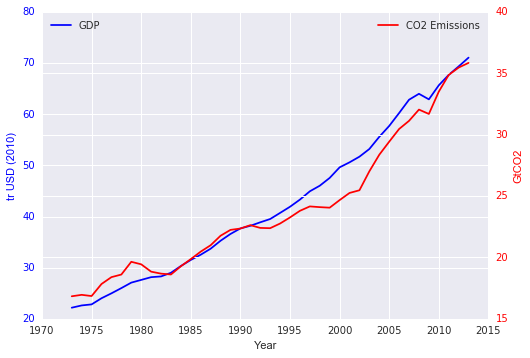

In [50]:
fig, ax1 = plt.subplots()
ax1.plot(Y['WLD'], color = 'b', label = "GDP")
ax2 = ax1.twinx()
ax2.plot(E['WLD'], color = 'r', label = 'CO2 Emissions')

ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('tr USD (2010)', color='b')
ax1.tick_params('y', colors='b')

ax2.set_ylabel('GtCO2', color='r')
ax2.tick_params('y', colors='r')
ax1.legend(loc = 'upper left')
ax2.legend()
plt.show()


In [60]:
## convert data to np array

X = np.column_stack( ( np.log(K['WLD']), np.log(H['WLD']) ) )
X = sm.add_constant(X)
y = np.log(Y['WLD'])

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    WLD   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     7392.
Date:                Wed, 19 Apr 2017   Prob (F-statistic):           5.87e-50
Time:                        15:39:34   Log-Likelihood:                 107.09
No. Observations:                  41   AIC:                            -208.2
Df Residuals:                      38   BIC:                            -203.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.3555      0.098     -3.627      0.0

In [63]:
y = np.log(Y['WLD']) - np.log(H['WLD'])

t = np.array(range(len(y)))
X = np.column_stack( (np.log(K['WLD']) - np.log(H['WLD']), t) )
X = sm.add_constant(X)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    WLD   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2092.
Date:                Wed, 19 Apr 2017   Prob (F-statistic):           1.35e-39
Time:                        15:43:14   Log-Likelihood:                 110.63
No. Observations:                  41   AIC:                            -215.3
Df Residuals:                      38   BIC:                            -210.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4126      0.073     19.450      0.0

In [64]:
y = np.log(Y['WLD']) - np.log(H['WLD'])

t = np.array(range(len(y)))
X = np.column_stack( (np.log(K['WLD']) - np.log(H['WLD']), np.log(E['WLD']) - np.log(H['WLD']), t) )
X = sm.add_constant(X)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    WLD   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2617.
Date:                Wed, 19 Apr 2017   Prob (F-statistic):           4.10e-43
Time:                        15:45:07   Log-Likelihood:                 123.99
No. Observations:                  41   AIC:                            -240.0
Df Residuals:                      37   BIC:                            -233.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.3344      0.055     24.348      0.0